In [89]:
import pandas as pd

# Load the data
data_total = pd.read_csv('crimedata_total.csv')
data_week = pd.read_csv('crimedata_week.csv')

(data_total.head(), data_week.head(),)


(  date_single        offense_type  Total_Crimes
 0  2007-01-01  aggravated assault           101
 1  2007-01-01               arson             7
 2  2007-01-01              kidnap             4
 3  2007-01-01                rape            21
 4  2007-01-01             robbery            60,
          week offense_type  Total_Crimes
 0  2006-12-31        total           692
 1  2007-01-07        total           704
 2  2007-01-14        total           692
 3  2007-01-21        total           614
 4  2007-01-28        total           658)

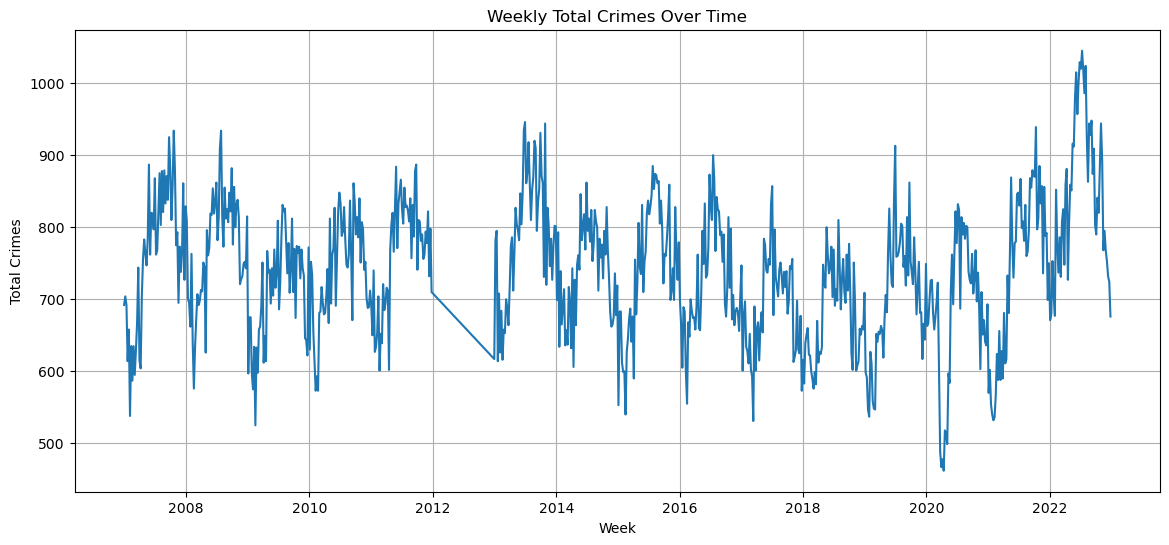

In [90]:
import matplotlib.pyplot as plt

# Convert 'week' column to datetime
data_week['week'] = pd.to_datetime(data_week['week'])

# Plotting the weekly total crimes
plt.figure(figsize=(14, 6))
plt.plot(data_week['week'], data_week['Total_Crimes'], linestyle='-', markersize=4)
plt.title('Weekly Total Crimes Over Time')
plt.xlabel('Week')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()


In [91]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(data_week['Total_Crimes'])
adf_df = pd.DataFrame({"Test Statistic": [adf_result[0]], 
                       "p-value": [adf_result[1]], 
                       "Lags Used": [adf_result[2]], 
                       "Number of Observations Used": [adf_result[3]],
                       "Critical Values": [adf_result[4]]})

adf_df

,Test Statistic,p-value,Lags Used,Number of Observations Used,Critical Values
0,-6.024272,1.468640e-07,9,773,"{'1%': -3.438837902109151, '5%': -2.8652862410..."


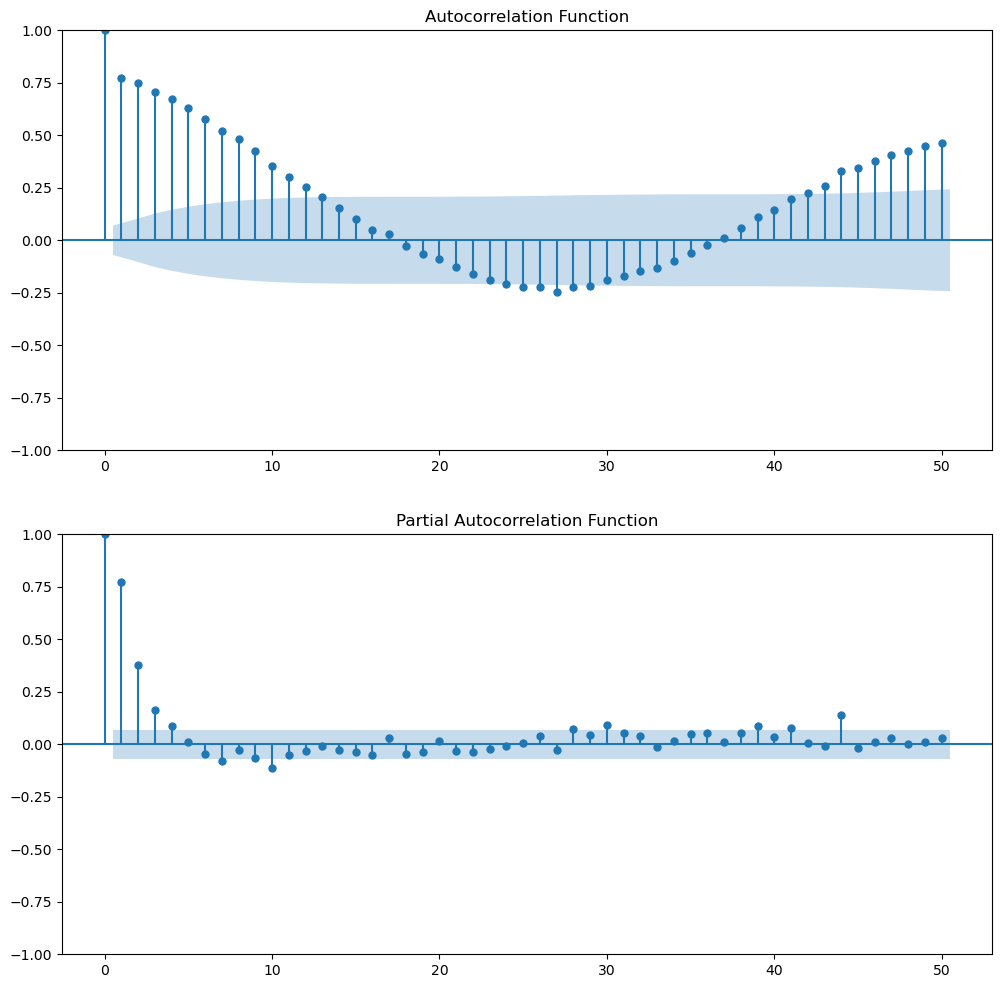

In [92]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

plot_acf(data_week['Total_Crimes'], lags=50, ax=ax1)
ax1.set_title('Autocorrelation Function')

plot_pacf(data_week['Total_Crimes'], lags=50, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

plt.show()


In [59]:
import pmdarima as pm

# Use auto_arima to find the best SARIMA model
auto_model = pm.auto_arima(data_week['Total_Crimes'], seasonal=True, m=52,
                           trace=True, error_action='ignore', suppress_warnings=True,
                           stepwise=True)

auto_model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=8490.600, Time=18.57 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=9350.990, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=8631.619, Time=3.28 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=8924.119, Time=4.53 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=12583.078, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=8493.775, Time=9.96 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=8490.106, Time=13.66 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=8511.536, Time=0.23 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=8480.759, Time=128.17 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=8483.049, Time=124.92 sec
 ARIMA(1,0,2)(2,0,0)[52] intercept   : AIC=8471.672, Time=97.57 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=8483.980, Time=12.19 sec
 ARIMA(1,0,2)(2,0,1)[52] intercept   : AIC=inf, Time=92.32 sec
 ARIMA(1,0,2)(1,0,1)[52] intercept   : AIC=8489.957, Time=14.27 sec
 ARIMA(0,0,2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  783
Model:             SARIMAX(1, 0, 2)x(2, 0, [], 52)   Log Likelihood               -4228.836
Date:                             Mon, 22 Apr 2024   AIC                           8471.672
Time:                                     18:13:37   BIC                           8504.314
Sample:                                          0   HQIC                          8484.224
                                             - 783                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     30.9211      8.445      3.662      0.000      14.370      47.472
ar.L1          0.9388      0.016     59.417      0.000       0.908       0.970
ma.L1         -0.5945      0.035    -16.747      0.000      -0.664      -0.525
ma.L2          0.0668      0.039      1.729      0.084      -0.009       0.142
ar.S.L52       0.1688      0.038      4.488      0.000       0.095       0.243
ar.S.L104      0.1498      0.035      4.290      0.000       0.081       0.218
sigma2      2853.2556    143.671     19.860      0.000    2571.665    3134.846
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.95   Prob(JB):                         0.38
Heteroskedasticity (H):               1.09   Skew:                            -0.12
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/Users/vincent/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vincent/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/vincent/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/vincent/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  re

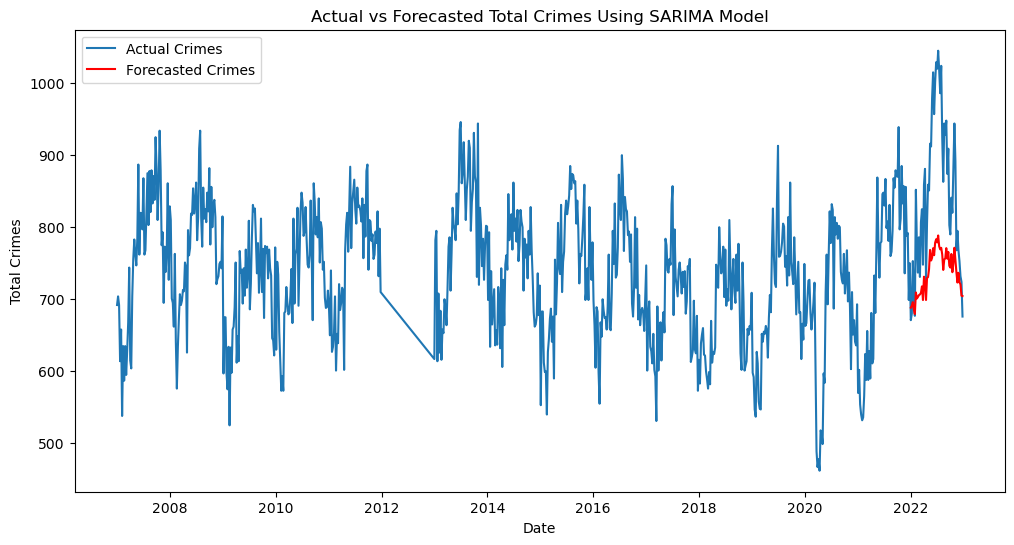

138.7433438262807

In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Set index
crime_data = data_week
crime_data['week'] = pd.to_datetime(crime_data['week'])
crime_data.set_index('week', inplace=True)
total_crimes_series = crime_data['Total_Crimes']

# Define the optimal SARIMA model
model = SARIMAX(total_crimes_series, order=(1, 0, 2), seasonal_order=(2, 0, 0, 52))

# Fit the model
fit_model = model.fit(disp=False)

# Get the last 52 weeks of data for forecasting
last_52_weeks = total_crimes_series[-52:]
forecast = fit_model.get_forecast(steps=52)
forecast_index = last_52_weeks.index
forecast_values = forecast.predicted_mean

# Plot
plt.figure(figsize=(12, 6))
plt.plot(total_crimes_series.index, total_crimes_series, label='Actual Crimes')
plt.plot(forecast_index, forecast_values, label='Forecasted Crimes', color='red')
plt.title('Actual vs Forecasted Total Crimes Using SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Total Crimes')
plt.legend()
plt.show()

# Calculate RMSE
rmse = sqrt(mean_squared_error(last_52_weeks, forecast_values))
rmse

